- Student name: Ufuk Cem Birbiri


#Some code to run Pyspark on Google Colab

In [130]:
# install java

#!apt-get install openjdk-8-jdk-headless -qq > /dev/null


In [131]:
# install spark (change the version number if needed)

#!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz


In [132]:

# unzip the spark file to the current folder

#!tar xf spark-3.0.0-bin-hadoop3.2.tgz

In [133]:
# set your spark folder to your system path environment. 

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


In [134]:
# install findspark using pip

#!pip install -q findspark


In [135]:
#!pip install pyspark

In [136]:
#We need to locate Spark in the system. For that, we import findspark and use the findspark.init() method.
import findspark
findspark.init()

In [137]:
#You can give a name to the session using appName() and add some configurations with config() if you wish.

from pyspark.sql import SparkSession

spark = SparkSession.builder\
        .master("local")\
        .appName("Colab")\
        .config('spark.ui.port', '4056')\
        .getOrCreate()

In [138]:
#Finally, print the SparkSession variable.
spark

#PROJECT


- Name: Ufuk Cem Birbiri
- email: uccbirbiri@gmail.com

This project consist of two parts.

- A. Data Exploration with PySpark
- B. PIPELINE

In (A), we will discover the dataset. We will do the followings:

1.   Change column types (Example: from string to numeric)
2.   Drop rows in the target column if the value is 'null'. We do this because if we don't know the target value, we cannot use it in classification.
3.   Handle the missing values:

*   NA's in numerical columns will be converted to 'mean' value
*   NA's in string columns will be converted to 'Unknown'

4. Drop some columns according to necessity and correlation metrix and heatmap


In (B), I created a pipeline. This pipeline includes all of the steps in (A) and also ML model and final results. The raw/unprocessed data will be given to pipeline and these steps in (A) is done with custom functions that I created. You will just read the csv file and split it as test and train data, then give it to pipeline. All the preprocessing, data manipulation and classification is done in the pipeline. At the end, you can get the results of classification.


Question:

Data Exploration is done in pipeline, so why do have an extra part for data exploration? 
- Because we need to analyse the data first. Learn about it and implement code to preprocess it. Then, I added all the exploration codes to the pipeline easily.  







#A. Data Exploration with PySpark

Read the csv file.

In [139]:
#The dataset can be found in the following url:
#
#https://www.kaggle.com/jsphyg/weather-dataset-rattle-package
#
#Change the path for your computer.
df = spark.read.csv("/content/weatherAUS.csv", header=True, inferSchema=True)

See the column names and types:

In [140]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: string (nullable = true)
 |-- MaxTemp: string (nullable = true)
 |-- Rainfall: string (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: string (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: string (nullable = true)
 |-- WindSpeed3pm: string (nullable = true)
 |-- Humidity9am: string (nullable = true)
 |-- Humidity3pm: string (nullable = true)
 |-- Pressure9am: string (nullable = true)
 |-- Pressure3pm: string (nullable = true)
 |-- Cloud9am: string (nullable = true)
 |-- Cloud3pm: string (nullable = true)
 |-- Temp9am: string (nullable = true)
 |-- Temp3pm: string (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



Now, see the first 5 rows of the data frame:

In [141]:
df.show(5)

+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation|Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+--------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|         NA|      NA|          W|           44|         W|       WNW|          20|          24|         71|         22|     1007.7|     1007.1|       8|      NA|   16.9|   21.8|       No|          No|
|2008-12-02|

All of the column types are string, but some column types should be integer of float . They shouldn't be integer because they have seems float type. Float is a good choice to convert them, so let's convert the some columns to float. 

In [142]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col

df= df.withColumn("MinTemp",col("MinTemp").cast(FloatType()))
df= df.withColumn("MaxTemp",col("MaxTemp").cast(FloatType()))
df= df.withColumn("Rainfall",col("Rainfall").cast(FloatType()))
df= df.withColumn("Evaporation",col("Evaporation").cast(FloatType()))
df= df.withColumn("Sunshine",col("Sunshine").cast(FloatType()))
df= df.withColumn("WindGustSpeed",col("WindGustSpeed").cast(FloatType()))
df= df.withColumn("WindSpeed9am",col("WindSpeed9am").cast(FloatType()))
df= df.withColumn("WindSpeed3pm",col("WindSpeed3pm").cast(FloatType()))
df= df.withColumn("Humidity9am",col("Humidity9am").cast(FloatType()))
df= df.withColumn("Humidity3pm",col("Humidity3pm").cast(FloatType()))

df= df.withColumn("Pressure9am",col("Pressure9am").cast(FloatType()))
df= df.withColumn("Pressure3pm",col("Pressure3pm").cast(FloatType()))
df= df.withColumn("Cloud9am",col("Cloud9am").cast(FloatType()))
df= df.withColumn("Cloud3pm",col("Cloud3pm").cast(FloatType()))

df= df.withColumn("Temp9am",col("Temp9am").cast(FloatType()))
df= df.withColumn("Temp3pm",col("Temp3pm").cast(FloatType()))


Let's see whether they onverted or not:

In [143]:
df.printSchema()

root
 |-- Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: float (nullable = true)
 |-- MaxTemp: float (nullable = true)
 |-- Rainfall: float (nullable = true)
 |-- Evaporation: float (nullable = true)
 |-- Sunshine: float (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: float (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: float (nullable = true)
 |-- WindSpeed3pm: float (nullable = true)
 |-- Humidity9am: float (nullable = true)
 |-- Humidity3pm: float (nullable = true)
 |-- Pressure9am: float (nullable = true)
 |-- Pressure3pm: float (nullable = true)
 |-- Cloud9am: float (nullable = true)
 |-- Cloud3pm: float (nullable = true)
 |-- Temp9am: float (nullable = true)
 |-- Temp3pm: float (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RainTomorrow: string (nullable = true)



How many rows are there in the dataset?

In [144]:
#Number of rows:
df.count()

145460

##Handling NA values

####1. For Float type columns, I will replace NAs (nulls) with mean value:

In [145]:
import pyspark.sql.functions as F
import numpy as np

#Float type columns are:
numerical_cols = [df.dtypes[i][0] for i in range(len(df.dtypes)) if df.dtypes[i][1]=='float']

from pyspark.ml.feature import Imputer

#Use imputer to replace NULL's to mean values:
imputer = Imputer(
    inputCols=numerical_cols, 
    outputCols=numerical_cols
    ).setStrategy("mean")

# Add imputation cols to df
df = imputer.fit(df).transform(df)

In [146]:
df.show(5)

+----------+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation| Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|  5.4682317|7.6111774|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|     8.0| 4.50993|   16.9|   21.8|       No|          No|
|2008-12

####2.  I will replace NAs (nulls) in string-type columns with "Unknown".

In string-type columns, null values are written as 'NA'. This 'NA' does not correspond to null , None or NaN. It is just a string indicating the missing value. First, we need to replace 'NA' to null. Then, we can replace null to 'Unknow'.

In [147]:
#Define string-type columns:
string_cols = [df.dtypes[i][0] for i in range(len(df.dtypes)) if df.dtypes[i][1]=='string']
string_cols

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [148]:
from pyspark.sql.functions import when, lit, col

def replace(column, value):
    return when(column != value, column).otherwise(lit(None))

for colss in string_cols:
  df=df.withColumn(colss, replace(col(colss), "NA"))
df.show(15)

+----------+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation| Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|  5.4682317|7.6111774|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|     8.0| 4.50993|   16.9|   21.8|       No|          No|
|2008-12

'NA' values are replaced by null values. Before converting them to 'Unknown', we have to do some operation in target column 'RainTomorrow'.
The target column in our ML model will be 'RainTomorrow'.
 

If there are null values in that column, we need to remove this rows because we need to know the ground truth target values. Let's see how many null values in 'RainTomorrow' target column:


In [149]:
df.where(df["RainTomorrow"].isNull()).select("RainTomorrow").count()

3267

There are 3267 null values in target column 'RainTomorrow'. 

In [150]:
df.count()

145460

In [151]:
#Drop the null values in target column:
df=df.na.drop(subset=["RainTomorrow"])

In [152]:
#New dataset size:
df.count()

142193

##Replace Null to 'Unknown'

In [153]:
df=df.fillna("Unknown")
df.show(15)

+----------+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|      Date|Location|MinTemp|MaxTemp|Rainfall|Evaporation| Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+----------+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|2008-12-01|  Albury|   13.4|   22.9|     0.6|  5.4682317|7.6111774|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|     8.0| 4.50993|   16.9|   21.8|       No|          No|
|2008-12

##Column Analysis

Let's investigate some columns separately.

See some statistics:

In [154]:
#Describing the column statistics
df.describe().show()

+-------+----------+--------+-----------------+------------------+-----------------+-----------------+------------------+-----------+------------------+----------+----------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+------------------+-----------------+-----------------+---------+------------+
|summary|      Date|Location|          MinTemp|           MaxTemp|         Rainfall|      Evaporation|          Sunshine|WindGustDir|     WindGustSpeed|WindDir9am|WindDir3pm|      WindSpeed9am|      WindSpeed3pm|       Humidity9am|       Humidity3pm|       Pressure9am|       Pressure3pm|          Cloud9am|          Cloud3pm|          Temp9am|          Temp3pm|RainToday|RainTomorrow|
+-------+----------+--------+-----------------+------------------+-----------------+-----------------+------------------+-----------+------------------+----------+----------+------------------+------------------+----------------

##Date Column

Let's see how many distinct values 'Date' cloumn has.

In [155]:
df.select("Date").distinct().count()

3436

I think date information is not related to rain situation. For a machine learning algorithm it is not a good feature to know about the date to predict feature rain condition. We aldready have 'RainToday' column in the data frame, which is enough. I prefer to remove this 'Date' column also.

In [156]:
df = df.drop('Date')
df.show(3)

+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|Location|MinTemp|MaxTemp|Rainfall|Evaporation| Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+--------+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|  Albury|   13.4|   22.9|     0.6|  5.4682317|7.6111774|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|     8.0| 4.50993|   16.9|   21.8|       No|          No|
|  Albury|    7.4|   25.1|     0.0|  5.4682317|7.611

##Location Column

Let's see how many location we have in the dataset:

In [157]:
df.select("Location").distinct().count()

49

Again, Location is not an informative feature to predict if it rains tomorrow. Rain situation should be decided based on technical knowledge. I decided to drop 'Location' column as well.

In [158]:
df = df.drop('Location')
df.show(3)

+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|MinTemp|MaxTemp|Rainfall|Evaporation| Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Pressure3pm|Cloud9am|Cloud3pm|Temp9am|Temp3pm|RainToday|RainTomorrow|
+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+-----------+--------+--------+-------+-------+---------+------------+
|   13.4|   22.9|     0.6|  5.4682317|7.6111774|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|       22.0|     1007.7|     1007.1|     8.0| 4.50993|   16.9|   21.8|       No|          No|
|    7.4|   25.1|     0.0|  5.4682317|7.6111774|        WNW|         44.0|       NNW|   

We have analysed the dataset and did some modifications such as removing some unnecessary columns, handling missing values etc. Now, it's time to build ML models.

##HEATMAP Analysis

We will see the correlation matrix of the numerical features. If they are very correlated, we can drop these features.

In [159]:
from pyspark.mllib.stat import Statistics
import pandas as pd
#Convert Pyspark dataFrame to pandas dataFrame.
#Result can be used w/ seaborn's heatmap.
def compute_correlation_matrix(df, method='pearson'):
    df_rdd = df.rdd.map(lambda row: row[0:])
    corr_mat = Statistics.corr(df_rdd, method=method)
    corr_mat_df = pd.DataFrame(corr_mat,
                    columns=df.columns, 
                    index=df.columns)
    return corr_mat_df

corr=compute_correlation_matrix(df[numerical_cols])

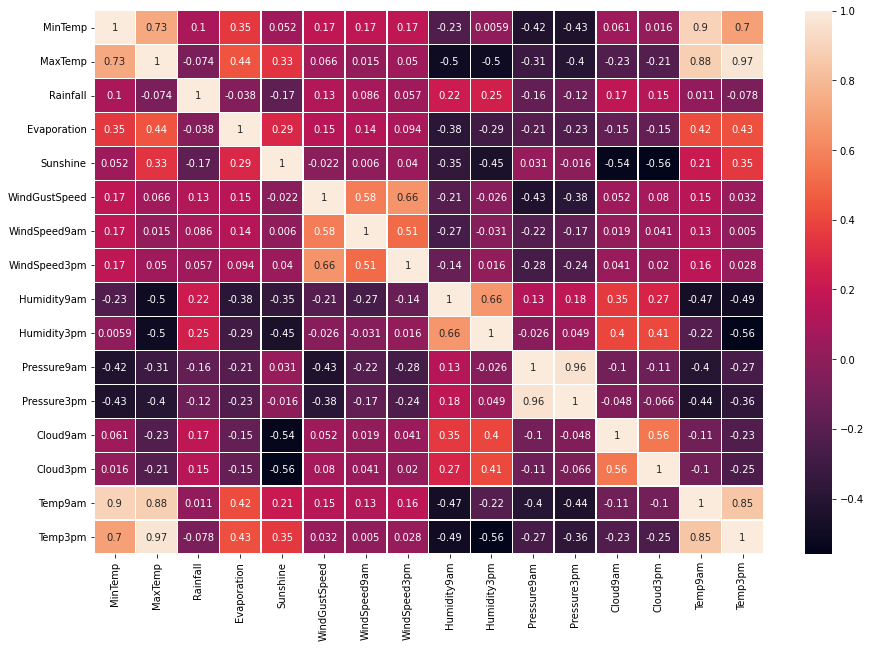

In [160]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import VectorAssembler
import matplotlib.pyplot as plt
import seaborn as sn

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sn.heatmap(corr, annot=True, linewidths=.5, ax=ax)

According to heatmap above, we can drop columns if the correlation is 0.85 or greater.

- MinTemp and Temp9am has corr 0.90
- MaxTemp and Temp9am has corr 0.88
- MaxTemp and Temp3pm has corr 0.97
- Temp9am and Temp3pm has corr 0.85
- Pressure3pm and Pressure9am has corr 0.96

So, if we drop Temp9am, Temp3pm, and Pressure3pm the problem would be solved.


Let's see the new corr matrix and heatmap:

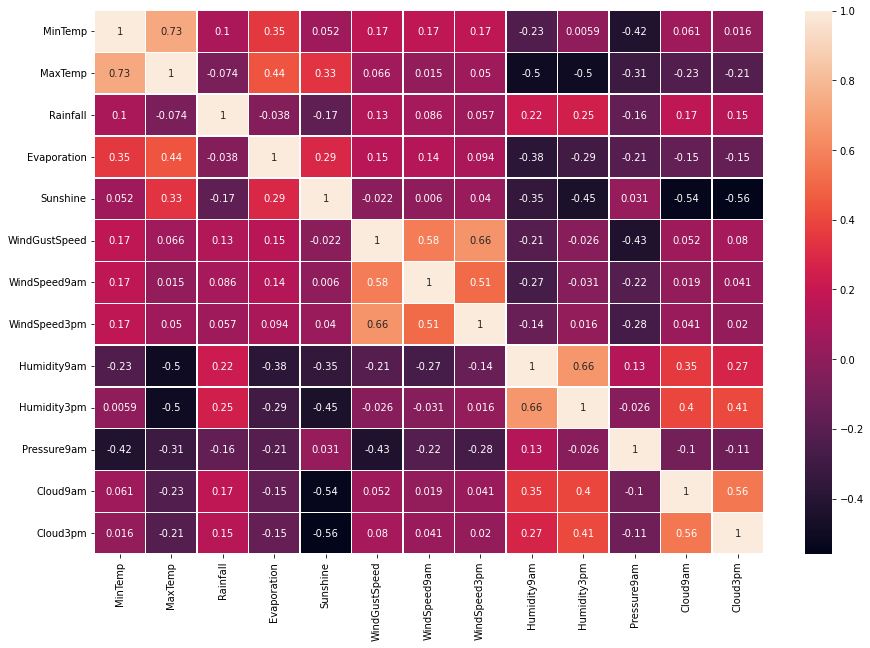

In [161]:
drop_this_cols= ['Pressure3pm', 'Temp9am', 'Temp3pm']
#Drop this columns:
numerical_cols_new = [item for item in numerical_cols if item not in drop_this_cols]

#Corr matrix of new numerical columns
corr2=compute_correlation_matrix(df[numerical_cols_new])

fig, ax = plt.subplots(figsize=(15,10))         # Sample figsize in inches
sn.heatmap(corr2, annot=True, linewidths=.5, ax=ax)

The heatmap seems quite well. There is no correlated features anymore.

#B. PIPELINE

Let's reload the dataset with a new name to process it again and use it in the pipeline. Our new dataset is called df2. We reload the dataset because we have already changed the values in the previous dataset(df).

In [163]:
#Our new dataFrame is called df2
df2 = spark.read.csv("/content/weatherAUS.csv", header=True, inferSchema=True)

##Stage-1
Some string-type columns are converted to numerical columns.

In [164]:
from pyspark.sql.types import FloatType
from pyspark.sql.functions import col
import pyspark.sql.functions as F
from pyspark.ml import Pipeline, Transformer
from pyspark.ml.feature import Bucketizer
from pyspark.sql import DataFrame
from typing import Iterable
import pandas as pd


#Stage-1

# Convert string-type columns to numerical type:
class Convert_string_columns_to_numeric(Transformer):
    def __init__(self):
        super(Convert_string_columns_to_numeric, self).__init__()

    def _transform(self, df: DataFrame) -> DataFrame:
        df= df.withColumn("MinTemp",col("MinTemp").cast(FloatType()))
        df= df.withColumn("MaxTemp",col("MaxTemp").cast(FloatType()))
        df= df.withColumn("Rainfall",col("Rainfall").cast(FloatType()))
        df= df.withColumn("Evaporation",col("Evaporation").cast(FloatType()))
        df= df.withColumn("Sunshine",col("Sunshine").cast(FloatType()))
        df= df.withColumn("WindGustSpeed",col("WindGustSpeed").cast(FloatType()))
        df= df.withColumn("WindSpeed9am",col("WindSpeed9am").cast(FloatType()))
        df= df.withColumn("WindSpeed3pm",col("WindSpeed3pm").cast(FloatType()))
        df= df.withColumn("Humidity9am",col("Humidity9am").cast(FloatType()))
        df= df.withColumn("Humidity3pm",col("Humidity3pm").cast(FloatType()))
        df= df.withColumn("Pressure9am",col("Pressure9am").cast(FloatType()))
        df= df.withColumn("Pressure3pm",col("Pressure3pm").cast(FloatType()))
        df= df.withColumn("Cloud9am",col("Cloud9am").cast(FloatType()))
        df= df.withColumn("Cloud3pm",col("Cloud3pm").cast(FloatType()))
        df= df.withColumn("Temp9am",col("Temp9am").cast(FloatType()))
        df= df.withColumn("Temp3pm",col("Temp3pm").cast(FloatType()))
        return df


stage_1 = Convert_string_columns_to_numeric()


##Stage-2
Replace null values to MEAN in numerical columns

In [165]:
import pyspark.sql.functions as F
import numpy as np
from pyspark.ml.feature import Imputer

#Stage-2

# In numerical columns, there are null values. We replace these null values to mean of the column.
class null_to_mean_in_numeric_cols(Transformer):
    def __init__(self):
        super(null_to_mean_in_numeric_cols, self).__init__()
    def _transform(self, df: DataFrame) -> DataFrame:
        #Numeric type columns are:
        numeric_cols = [df.dtypes[i][0] for i in range(len(df.dtypes)) if df.dtypes[i][1]=='float']
        #Use imputer to replace NULL's to mean values:
        imputer = Imputer(
            inputCols=numeric_cols, 
            outputCols=numeric_cols
            ).setStrategy("mean")
        # Add imputation cols to df
        df = imputer.fit(df).transform(df)
        return df


stage_2 = null_to_mean_in_numeric_cols()


#Stage-3
1. Replace NA to null in string columns 
2. Drop rows in target column ('RainTomorrow'), if that row has NA value. We do this because we need to know the target value. If we don't know the true label of the data point, we cannot use it in the classification model. 

In [166]:
from pyspark.sql.functions import when, lit, col

from pyspark.sql.types import FloatType
from pyspark.sql.functions import col

#Stage-3

# Replace NA to null.
# Drop NA's in target column.
class na_to_null_AND_drop_rows_in_targetColumn(Transformer):
    def __init__(self):
        super(na_to_null_AND_drop_rows_in_targetColumn, self).__init__()

    def _transform(self, df: DataFrame) -> DataFrame:
      string_cols = [df.dtypes[i][0] for i in range(len(df.dtypes)) if df.dtypes[i][1]=='string']
      def replace(column, value):
          return when(column != value, column).otherwise(lit(None))
      for colss in string_cols:
        df=df.withColumn(colss, replace(col(colss), "NA"))
      #Drop the null values in target column:
      df=df.na.drop(subset=["RainTomorrow"])
        
      return df


stage_3 = na_to_null_AND_drop_rows_in_targetColumn()



#Stage-4
1. Drop Date and Location columns because they are useless.
2. Drop Pressure3pm, Temp9am, Temp3pm columns because they are correleted with other columns more than 0.85. 
3. Change the null values to 'Unknown'

At the end of below cell, I build a small pipeline called 'model_preprocessor' that is used to test our preprocessing stages. We can check whether the implementation of stages is correct and the dataset columns are manipulated accordingly.

In [167]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline
#Stage_4

# Drop Date, Location, Pressure3pm, Temp9am, Temp3pm columns.
class drop_useless_columns(Transformer):
    def __init__(self):
        super(drop_useless_columns, self).__init__()

    def _transform(self, df: DataFrame) -> DataFrame:
      #Drop columns:
      df=df.drop("Date")
      df=df.drop("Location")
      df=df.drop("Pressure3pm")
      df=df.drop("Temp9am")
      df=df.drop("Temp3pm")

      #null to 'Unknown'
      df=df.fillna("Unknown")
 
      return df


stage_4 = drop_useless_columns()

#Below pipeline has the all stages of data preprocessing. 
#You can see the precessed data and check whether the functions work correctly or not.

#Define the mini-pipeline and fit the df2:
model_preprocessor = Pipeline(stages=[stage_1, stage_2, stage_3, stage_4]).fit(df2)
#Transform the df2:
processed_data = model_preprocessor.transform(df2)
print(processed_data.count())
print()
print(processed_data.columns)
print()
processed_data.show(15)

142193

['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Cloud9am', 'Cloud3pm', 'RainToday', 'RainTomorrow']

+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+--------+--------+---------+------------+
|MinTemp|MaxTemp|Rainfall|Evaporation| Sunshine|WindGustDir|WindGustSpeed|WindDir9am|WindDir3pm|WindSpeed9am|WindSpeed3pm|Humidity9am|Humidity3pm|Pressure9am|Cloud9am|Cloud3pm|RainToday|RainTomorrow|
+-------+-------+--------+-----------+---------+-----------+-------------+----------+----------+------------+------------+-----------+-----------+-----------+--------+--------+---------+------------+
|   13.4|   22.9|     0.6|  5.4682317|7.6111774|          W|         44.0|         W|       WNW|        20.0|        24.0|       71.0|     

The mini-pipeline works well. The columns and values are changed as expected.

Till here, we applied the Data Exploration functions in pipeline. We can build our ML models now.

##Machine Learning Part

Before going deep into ML models, let's load the dataset again becasue we have changed the columns of the previous dataset(df and df2) in 'Data Exploration' and 'Pipeline' parts. Our new dataset's name is df3. df3 is the raw data and not manipulated yet. We will use df3 in only ML models below.

In [168]:
#Our new dataFrame is called df3
df3 = spark.read.csv("/content/weatherAUS.csv", header=True, inferSchema=True)

Make the train & test split:

In [169]:
train, test = df3.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 101853
Test Dataset Count: 43607


Now, we can convert string-type columns to indexes with StringIndexer function. Then we will use OneHotEncoder to convert numerical variables to one hot vectors. At the end, we use VectorAssembler to convert all columns.

In [170]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder
from pyspark.ml.classification import LogisticRegression

# define stage 5.1, 5.2, 5.3, 5.4, 5.5
#We will encode the string-type columns separately:
stage_51 = StringIndexer(inputCol= 'WindGustDir', outputCol= 'WindGustDir_indexed')
stage_52 = StringIndexer(inputCol= 'WindDir9am', outputCol= 'WindDir9am_indexed')
stage_53 = StringIndexer(inputCol= 'WindDir3pm', outputCol= 'WindDir3pm_indexed')
stage_54 = StringIndexer(inputCol= 'RainToday', outputCol= 'RainToday_indexed')
#We should also encode the target colum 'RainTomorrow' to use it in ML prediction:
stage_55 = StringIndexer(inputCol= 'RainTomorrow', outputCol= 'RainTomorrow_indexed')

#Then, encode all columns to one hot:
stage_6 = OneHotEncoder(inputCols=[stage_51.getOutputCol(), stage_52.getOutputCol(), stage_53.getOutputCol(),stage_54.getOutputCol()],
                        outputCols= ['stage_51_encoded', 'stage_52_encoded','stage_53_encoded', 'stage_54_encoded'])

#VectorAssembler put together every column to one feature column:
stage_7 = VectorAssembler(inputCols=['stage_51_encoded', 'stage_52_encoded','stage_53_encoded','stage_54_encoded',
                                     'MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am',
                                      'WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Cloud9am','Cloud3pm'],
                          outputCol='features')



#1. Logistic Regression

In [171]:
#Build logistic regression model.
#The target column becomes 'RainTomorrow_indexed' since we encoded it to numeric type (to 0s and 1s).       
lr = LogisticRegression(featuresCol = 'features', 
                        labelCol = 'RainTomorrow_indexed', 
                        maxIter=10)

#Setup the pipeline:
LogisticReg_pipeline = Pipeline(stages= [stage_1, stage_2, stage_3, stage_4, #Data manipualtion stages
                                         stage_51, stage_52, stage_53, stage_54, stage_55, #StringIndexer stages
                                         stage_6,  #OneHotEncoder 
                                         stage_7, #VectorAssembler 
                                         lr 
                                         ])

Build Cross-validation model and fit the data:

In [172]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#Parameters that investigate:
param_grid_lr = ParamGridBuilder().addGrid(
    lr.regParam, [0.1, 0.01]
).build()

#Define BinaryClassificationEvaluator for ROC metric:
evaluator_lr = BinaryClassificationEvaluator(labelCol="RainTomorrow_indexed", 
                                          rawPredictionCol="prediction", 
                                          metricName='areaUnderROC')

# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# Number of folds is 4.
cv_lr = CrossValidator(estimator=LogisticReg_pipeline, 
                    estimatorParamMaps=param_grid_lr, 
                    evaluator=evaluator_lr, 
                    numFolds=4)

# Run cross-validation, and choose the best set of parameters.
cv_model_lr = cv_lr.fit(train)




Make predcition on test set:

In [173]:
predictions_lr = cv_model_lr.transform(test).select("RainTomorrow_indexed", "prediction")


###Evaluation metrics:

1. Area Under ROC:

In [174]:
auc_lr = evaluator_lr.evaluate(predictions_lr)
print("Test Area Under ROC = ",auc_lr)

Test Area Under ROC =  0.7054391004649162


2. Accuracy, F1 Score, Weighted Precision, Weighted Recall

In [175]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Define BinaryClassificationEvaluator for Accuracy, F1 Score, Weighted Precision, Weighted Recall metrics:
evaluator_m = MulticlassClassificationEvaluator(
    labelCol="RainTomorrow_indexed", predictionCol="prediction", metricName="accuracy")



acc = evaluator_m.evaluate(predictions_lr, {evaluator_m.metricName: "accuracy"})
print("Accuracy on test set = ", acc)

f1 = evaluator_m.evaluate(predictions_lr, {evaluator_m.metricName: "f1"})
print("F1 Score on test set = ", f1)

weightedPrecision = evaluator_m.evaluate(predictions_lr, {evaluator_m.metricName: "weightedPrecision"})
print("WeightedPrecision on test set = ", weightedPrecision)

weightedRecall = evaluator_m.evaluate(predictions_lr, {evaluator_m.metricName: "weightedRecall"})
print("WeightedRecall on test set = ", weightedRecall)




Accuracy on test set =  0.8369175206960437
F1 Score on test set =  0.8233247777383061
WeightedPrecision on test set =  0.8258537985686408
WeightedRecall on test set =  0.8369175206960437


We got 0.836 accuracy and 0.823 F1 score. Not bad!

#2. Random Forest Classifier

Build Random Forest pipeline:


In [177]:
from pyspark.ml.classification import RandomForestClassifier

#Build a Random Forest model.    
rf = RandomForestClassifier(featuresCol = 'features', 
                        labelCol = 'RainTomorrow_indexed')

#Setup the pipeline:
RandomForest_pipeline = Pipeline(stages= [stage_1, stage_2, stage_3, stage_4, #Data manipualtion stages
                                         stage_51, stage_52, stage_53, stage_54, stage_55, #StringIndexer stages
                                         stage_6,  #OneHotEncoder 
                                         stage_7, #VectorAssembler 
                                         rf
                                         ])

Build cross-validation model and test parameters:

In [178]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.feature import HashingTF, Tokenizer
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

#Parameters that investigate:
param_grid_rf = ParamGridBuilder().addGrid(
    rf.numTrees, [20, 50]
    
).addGrid(
    rf.maxDepth, [5,10]
).build()

#Define the evaluator for ROC:
evaluator_rf = BinaryClassificationEvaluator(labelCol="RainTomorrow_indexed", 
                                          rawPredictionCol="prediction", 
                                          metricName='areaUnderROC')


# A CrossValidator requires an Estimator, a set of Estimator ParamMaps, and an Evaluator.
# Number of folds is 4.
cv_rf = CrossValidator(estimator=RandomForest_pipeline, 
                    estimatorParamMaps=param_grid_rf, 
                    evaluator=evaluator_rf, 
                    numFolds=4)

# Run cross-validation, and choose the best set of parameters.
cv_model_rf = cv_rf.fit(train)




Make prediciton on test set:

In [179]:
predictions_rf = cv_model_rf.transform(test).select("RainTomorrow_indexed", "prediction")


###Evaluation metrics:

1. ROC

In [180]:
auc_rf = evaluator_rf.evaluate(predictions_rf)
print("Test Area Under ROC = ",auc_rf)

Test Area Under ROC =  0.6826417427330921


2. Accuracy, F1 Score, Weighted Precision, Weighted Recall

In [181]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

#Define BinaryClassificationEvaluator for Accuracy, F1 Score, Weighted Precision, Weighted Recall metrics:
evaluator_m = MulticlassClassificationEvaluator(
    labelCol="RainTomorrow_indexed", predictionCol="prediction", metricName="accuracy")



acc = evaluator_m.evaluate(predictions_rf, {evaluator_m.metricName: "accuracy"})
print("Accuracy on test set = ", acc)

f1 = evaluator_m.evaluate(predictions_rf, {evaluator_m.metricName: "f1"})
print("F1 Score on test set = ", f1)

weightedPrecision = evaluator_m.evaluate(predictions_rf, {evaluator_m.metricName: "weightedPrecision"})
print("WeightedPrecision on test set = ", weightedPrecision)

weightedRecall = evaluator_m.evaluate(predictions_rf, {evaluator_m.metricName: "weightedRecall"})
print("WeightedRecall on test set = ", weightedRecall)




Accuracy on test set =  0.83736310124059
F1 Score on test set =  0.8165169570183471
WeightedPrecision on test set =  0.8301040054276756
WeightedRecall on test set =  0.83736310124059


Table below summaries the results of both classifiers. 

Metrics             | Random Forest | Logistic Regression 
-------------------|------------------  | ------------------ 
ROC       | 0.682       | **0.705**
Accuracy       | **0.837**       | 0.836 
F1 Score       | 0.816       | **0.823**
WeightedPrecision      | **0.83**       | 0.825 
WeightedRecall      | 0.837       | 0.836

The logistic regression and random forest classification results are very close to each other.